<div style="display: flex; justify-content: space-between;">
<a style="flex: 1; text-align: left;" href="./6_1_3_Traffic.ipynb">← Previous: Appendix A.3: Traffic Data</a>
<a style="flex: 1; text-align: right;" href="./6_2_2_MLR_bus_traffic.ipynb">Next: Appendix B.2: MLR With Traffic →</a>
</div>

### Appendix B.1: MLR With Weather
---


The purpose of this notebook is to make a predictive model based on the bus data provided by the STM and the weather data provided by the Government of Canada.  
The goal is to predict the end of trip delay (delay_end) for a bus based on the following variables:
 - Delay at start (delay_start)
 - Start time (start_time)
 - Temperature at start (temp_start)
 - Snow amount on ground (snow_amt)
 - Bus line (line)



In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
#Import master data
df_master = pd.read_csv('../Data/master_data.csv')

#drop columns that are not needed
df_master = df_master.drop(columns=['id','total_snow'])
df_master = df_master.dropna()

df_test = df_master.drop(columns=['date','end_time'])

#change bus lines 67, 80, 100, 121, 139, 439, 467, 480, 460 to 1,2,3,4,5,6,7,8 respectively
df_test['line'] = df_test['line'].replace([67, 80, 100, 121, 139, 439, 467, 480, 460], [1,2,3,4,5,6,7,8,9])
#convert the start_time column to minutes after midnight
df_test['start_time'] = pd.to_datetime(df_test['start_time'], format='%H:%M:%S')
df_test['start_time'] = df_test['start_time'].dt.hour * 60 + df_test['start_time'].dt.minute

df_test.head().to_markdown()

'|    |   line |   delay_start |   start_time |   temp_start |   rain_amt |   snow_amt |   delay_end |\n|---:|-------:|--------------:|-------------:|-------------:|-----------:|-----------:|------------:|\n|  0 |      3 |             0 |           10 |         15.1 |          0 |          0 |          -1 |\n|  1 |      3 |             0 |           42 |         15.1 |          0 |          0 |          -3 |\n|  2 |      3 |            -1 |           73 |         13.7 |          0 |          0 |          -5 |\n|  3 |      3 |             0 |          306 |         11.8 |          0 |          0 |          -2 |\n|  4 |      3 |             2 |          341 |         11.8 |          0 |          0 |          -1 |'

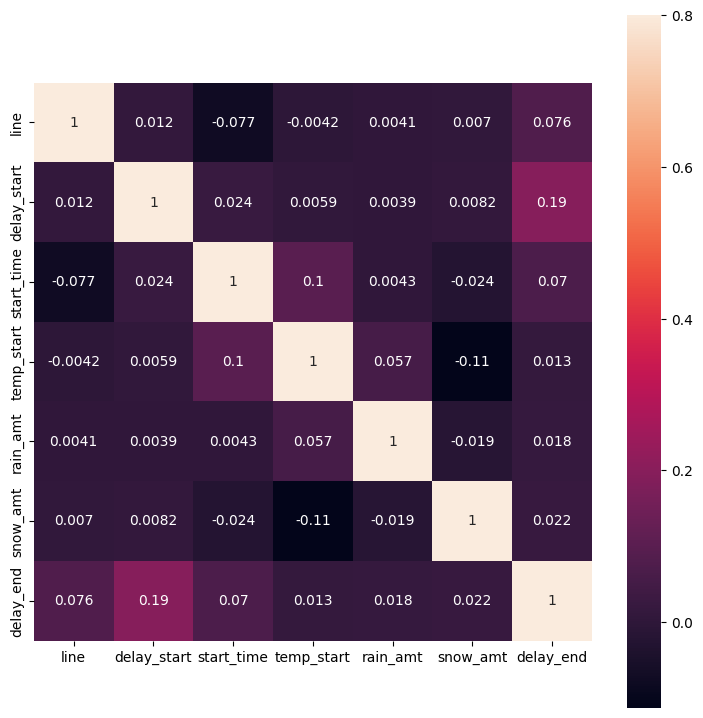

In [3]:
Corr_mat = df_test.corr()
fig = plt.figure(figsize = (9,9))

sb.heatmap(Corr_mat, vmax = .8, square = True, annot=True)
plt.savefig('../Images/3_1_1_corr_mat_1.png')
plt.show()

In [4]:
predictors = ['delay_start', 'start_time', 'temp_start', 'rain_amt', 'snow_amt', 'line']
outcome = 'delay_end'

In [5]:
for i in range(len(predictors)):
    for j in range(len(predictors)):
        if i<j:
            corr, _ = pearsonr(df_test[predictors[i]], df_test[predictors[j]])
            print('The correlation between', predictors[i], 'and', predictors[j], 'is', corr)

The correlation between delay_start and start_time is 0.02443191113084113
The correlation between delay_start and temp_start is 0.005926468145248259
The correlation between delay_start and rain_amt is 0.003918746683696845
The correlation between delay_start and snow_amt is 0.008249960576945194
The correlation between delay_start and line is 0.011574383589575663
The correlation between start_time and temp_start is 0.10077189984427726
The correlation between start_time and rain_amt is 0.004253340019246771
The correlation between start_time and snow_amt is -0.024176273843384742
The correlation between start_time and line is -0.07727617810622817
The correlation between temp_start and rain_amt is 0.05680562338511451
The correlation between temp_start and snow_amt is -0.11309762999522555
The correlation between temp_start and line is -0.004207449514883608
The correlation between rain_amt and snow_amt is -0.018916201405556044
The correlation between rain_amt and line is 0.004067704916326454
T

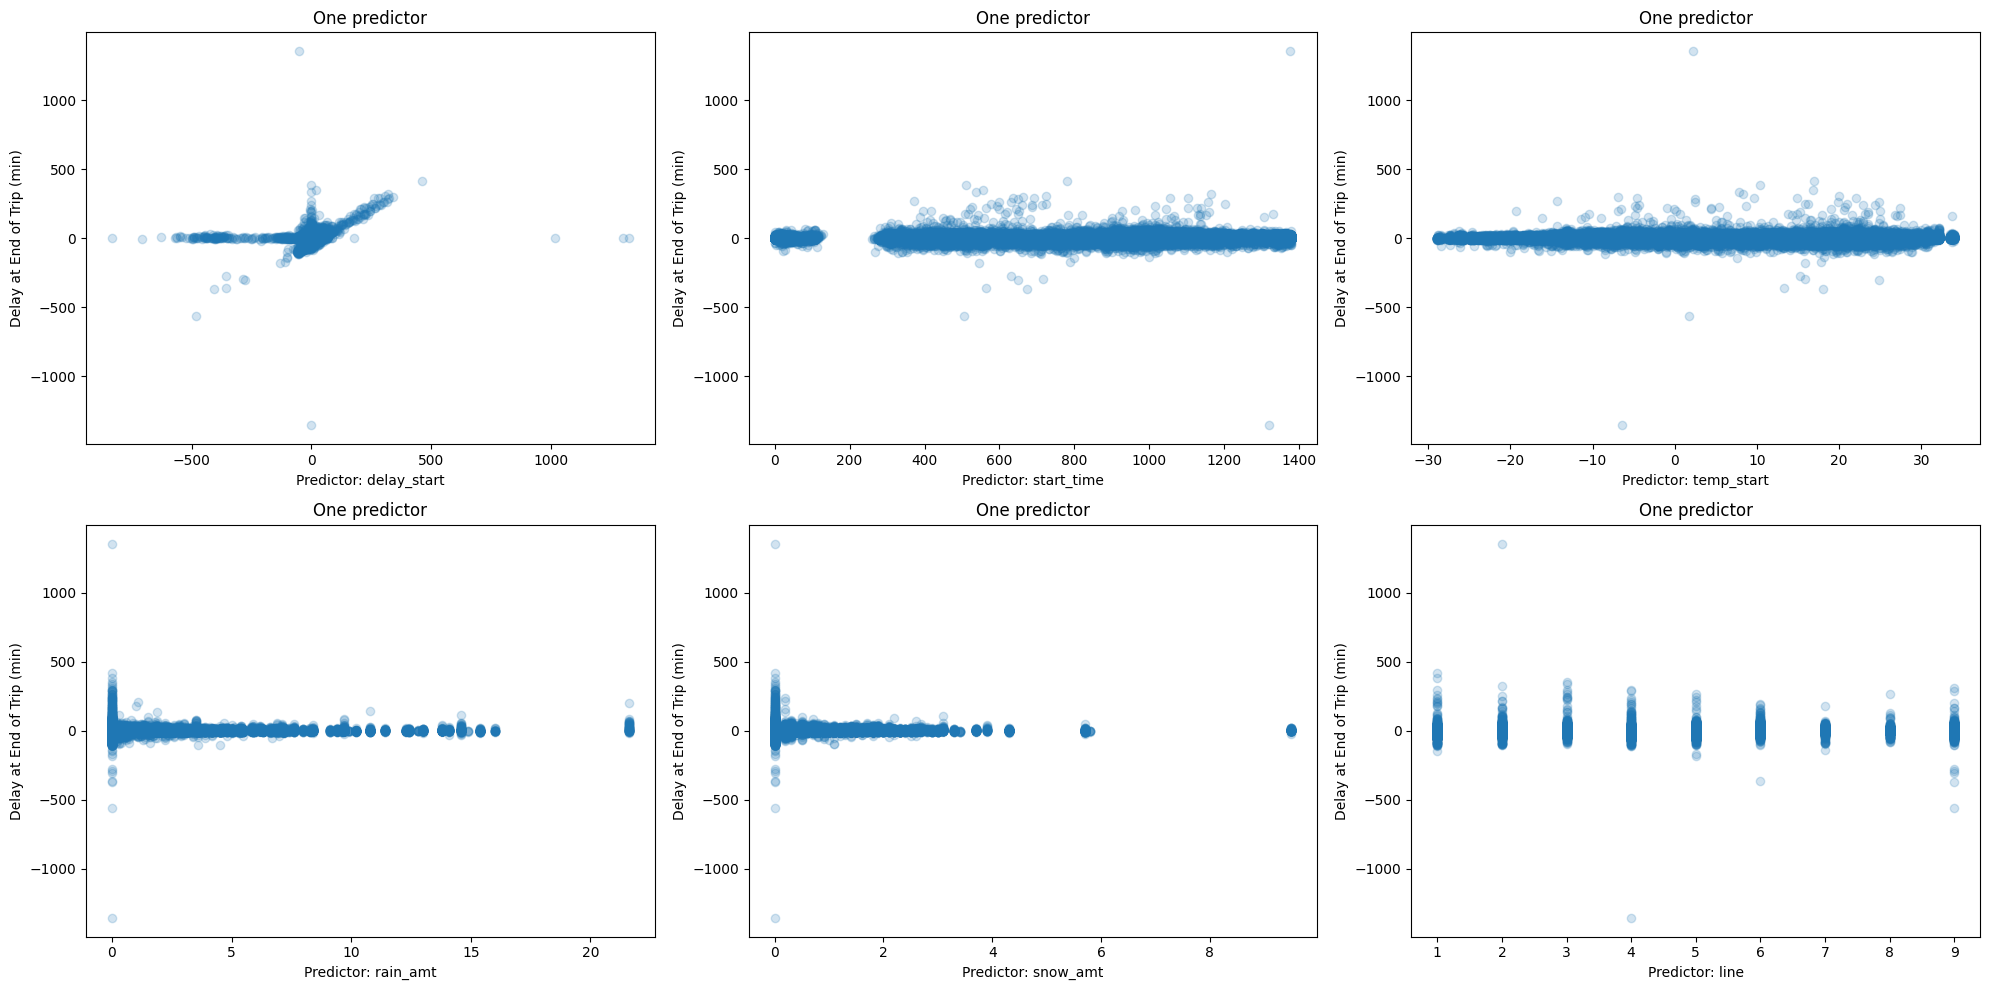

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i, axi in enumerate(ax.flat):
    axi.scatter(df_test[predictors[i]], df_test[outcome], color='tab:blue', alpha=0.2)
    axi.set_ylabel('Delay at End of Trip (min)')
    axi.set_xlabel(f'Predictor: {predictors[i]}')
    axi.set_title("One predictor");

plt.tight_layout()
plt.savefig('../Images/3_1_2_scatter_plots_1.png')
plt.show()

In [7]:
model = sm.OLS(df_test[outcome], df_test[predictors].assign(const=1))
results = model.fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              delay_end   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     5998.
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:09:50   Log-Likelihood:            -2.4334e+06
No. Observations:              697550   AIC:                         4.867e+06
Df Residuals:                  697543   BIC:                         4.867e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
delay_start     0.2073      0.001    163.832      0.000       0.205       0.210
start_time      0.0018      3e-05     60.341      0.000       0.002       0.002
temp_start      0.0048      0.001      5.971      0.000       0.003       0.006
rain_amt        0.2018      0.014     14.107      0.000       0.174       0.230
snow_amt        0.8121      0.043     19.077      0.000       0.729       0.896
line            0.2835      0.004     67.653      0.000       0.275       0.292
const          -0.2914      0.031     -9.280      0.000      -0.353      -0.230
==============================================================================
Omnibus:                   537217.729   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     195004436719.336
Skew:                           1.488   Prob(JB):                         0.00
Kurtosis:                    2593.239   Cond. No.                     3.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Assuming 'results' is the result of a statsmodels regression
summary = results.summary()

# Initialize an empty string for the markdown text
markdown_text = ""

# Iterate over all tables in the summary
for i, table in enumerate(summary.tables):
    # Convert the table to a DataFrame
    df_table = pd.DataFrame(table.data)
    
    # Set the DataFrame's column headers to the first row of data
    df_table.columns = df_table.iloc[0]
    df_table = df_table[1:]
    
    # Convert the DataFrame to a markdown table
    markdown_table = df_table.to_markdown()
    
    # Append the markdown table to the markdown text
    markdown_text += f"**Table {i+1}**\n\n"
    markdown_text += markdown_table
    markdown_text += "\n\n"

# Print the markdown text
print(markdown_text)

**Table 1**

|    | Dep. Variable:    | delay_end        |   R-squared:            |    0.049    |
|---:|:------------------|:-----------------|:------------------------|:------------|
|  1 | Model:            | OLS              | Adj. R-squared:         | 0.049       |
|  2 | Method:           | Least Squares    | F-statistic:            | 5998.       |
|  3 | Date:             | Sat, 23 Dec 2023 | Prob (F-statistic):     | 0.00        |
|  4 | Time:             | 23:09:56         | Log-Likelihood:         | -2.4334e+06 |
|  5 | No. Observations: | 697550           | AIC:                    | 4.867e+06   |
|  6 | Df Residuals:     | 697543           | BIC:                    | 4.867e+06   |
|  7 | Df Model:         | 6                |                         |             |
|  8 | Covariance Type:  | nonrobust        |                         |             |

**Table 2**

|    |             |    coef |   std err |       t |   P>|t| |   [0.025 |   0.975] |
|---:|:------------|--------

In [10]:
mse = results.mse_resid

In [11]:
mse**0.5

7.921241181097022

In [12]:
results.params

delay_start    0.207299
start_time     0.001813
temp_start     0.004778
rain_amt       0.201840
snow_amt       0.812094
line           0.283506
const         -0.291413
dtype: float64

In [13]:
para = results.params
delay = 2
time = 7*60 + 30
temp = 15
rain = 0.1
snow = 0
line = 1

X = [delay, time, temp, rain, snow,line,1]
prediction = np.dot(para, X)
print(f"The bus should be delayed by {prediction} minutes.")


The bus should be delayed by 1.3144960834516604 minutes.


We have a very unreliable model with R-squared 0.049\
The data is too noisy to find any linearity\
We will try to find clusters of data that might be helpful in finding a relationship between the variables

In [14]:
#find the delays over 90% of the mean delay
# first we find the mean delay
mean_delay = df_master['delay_end'].mean()
cutoff = mean_delay*0.9
print(cutoff)


2.168390366281987


In [15]:
df_m = df_master.copy()
df_m = df_m.drop(columns=['date'])

In [16]:
#create a new column for time of day in minutes (tod_end) and another one for the hour of the day (hour_end)
df_m['tod_end'] = pd.to_datetime(df_m['end_time'], format='%H:%M:%S')
df_m['tod_end'] = df_m['tod_end'].dt.hour * 60 + df_m['tod_end'].dt.minute
df_m['hour_end'] = pd.to_datetime(df_m['end_time'], format='%H:%M:%S')
df_m['hour_end'] = df_m['hour_end'].dt.hour

#convert the start_time column to minutes after midnight
df_m['start_time'] = pd.to_datetime(df_m['start_time'], format='%H:%M:%S')
df_m['start_time'] = df_m['start_time'].dt.hour * 60 + df_m['start_time'].dt.minute

df_m.head()

,line,delay_start,start_time,end_time,temp_start,rain_amt,snow_amt,delay_end,tod_end,hour_end
0,100.0,0,10,00:44:00,15.1,0.0,0.0,-1,44,0
1,100.0,0,42,01:14:00,15.1,0.0,0.0,-3,74,1
2,100.0,-1,73,01:44:00,13.7,0.0,0.0,-5,104,1
3,100.0,0,306,05:39:00,11.8,0.0,0.0,-2,339,5
4,100.0,2,341,06:13:00,11.8,0.0,0.0,-1,373,6


In [17]:
#take data as delay as a function of end time (sort by end time)
#scan the data for any delays over the cutoff
#if there is a delay over the cutoff, check the next datapoint to see if it is also over the cutoff
#if it is, add the delay to a new dataframe

#create a dictionary of dataframes for each line AND hour of the day
df_line_hour = {value: df_m.loc[df_m['hour_end'] == value] for value in df_m['hour_end'].unique()}
df_line_hour = {key: {value: df_line_hour[key].loc[df_line_hour[key]['line'] == value] for value in df_line_hour[key]['line'].unique()} for key in df_line_hour.keys()}
#each dataframe can be accessed by df_line_hour[hour][line], e.g. df_line_hour[7][1] is the dataframe for line 1 at 7am

# Create dictionary df_lhtop10 to store the dataframes with delays over 90% of the mean delay
df_lhtop10 = {key: {} for key in df_line_hour.keys()}

for key in df_line_hour.keys():
    for value in df_line_hour[key].keys():
        # Sort df_line_hour[hour][line] by the values of 'tod_end'
        df_line_hour[key][value] = df_line_hour[key][value].sort_values(by='tod_end')
        # Create a boolean mask for rows where 'delay_end' is greater than or equal to the cutoff
        mask = df_line_hour[key][value]['delay_end'] >= cutoff
        # Shift the mask by one to compare with the next row
        mask_shifted = mask.shift(-1)
        # Combine the masks and select the rows from df_line_hour[hour][line]
        df_lhtop10[key][value] = df_line_hour[key][value][mask & mask_shifted].copy()

#each dataframe in df_lhtop10 can be accessed by df_lhtop10[hour][line], e.g. df_lhtop10[7][1] is the dataframe for line 1 at 7am



# Remove dataframes with less than 10 rows
for key in df_lhtop10.keys():
    for value in list(df_lhtop10[key].keys()):  # Create a list of keys since we're modifying the dictionary
        if len(df_lhtop10[key][value]) < 10:
            df_lhtop10[key].pop(value, None)


In [18]:
total_dfs = sum(len(df_lhtop10[hour]) for hour in df_lhtop10.keys())
print(total_dfs)

165


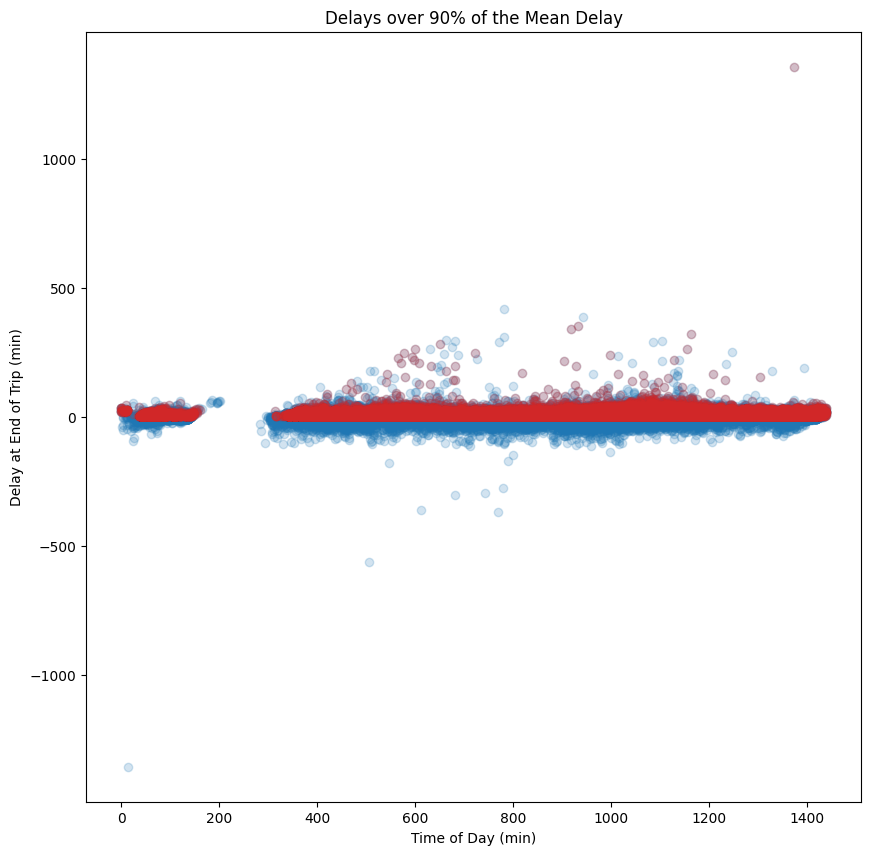

In [19]:
# Create a new dataframe with all the dataframes in df_lhtop10
df_top10 = pd.concat([df_lhtop10[key][value] for key in df_lhtop10.keys() for value in df_lhtop10[key].keys()])
df_top10 = df_top10.sort_values(by='tod_end')
df_top10.head()

#visualize the data by plotting df_m and df_top10  with delay_end on the y axis and tod_end on the x axis
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df_m['tod_end'], df_m['delay_end'], color='tab:blue', alpha=0.2)
ax.scatter(df_top10['tod_end'], df_top10['delay_end'], color='tab:red', alpha=0.2)
ax.set_ylabel('Delay at End of Trip (min)')
ax.set_xlabel('Time of Day (min)')
ax.set_title('Delays over 90% of the Mean Delay')
plt.savefig('../Images/3_1_3_filtered_data.png')
plt.show()


In [20]:
# remove end_time, tod_end and hour_end from all dataframes in df_lhtop10

for key in df_lhtop10.keys():
    for value in df_lhtop10[key].keys():
        df_lhtop10[key][value] = df_lhtop10[key][value].drop(columns=['end_time', 'tod_end', 'hour_end'])


In [21]:
# merge all dataframes in df_lhtop10 into one dataframe
df_final = pd.concat([df_lhtop10[key][value] for key in df_lhtop10.keys() for value in df_lhtop10[key].keys()])
df_final = df_final.sort_values(by='start_time')
df_final.head()


,line,delay_start,start_time,temp_start,rain_amt,snow_amt,delay_end
295583,80.0,0,0,15.3,0.0,0.0,7
492136,80.0,0,0,-6.2,0.0,0.0,5
112898,139.0,2,0,-21.7,0.0,0.0,10
225462,139.0,3,0,13.6,0.0,0.0,11
37734,80.0,0,0,8.4,0.0,0.0,5


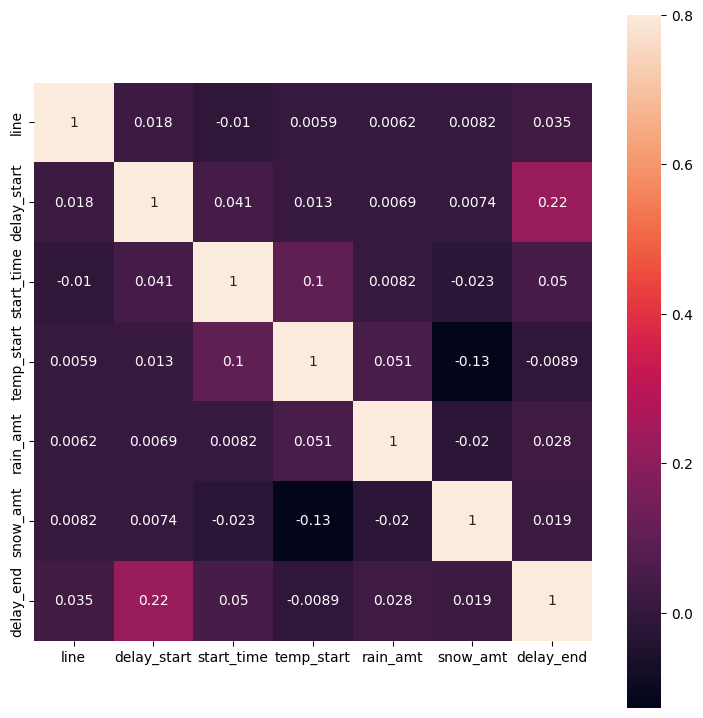

In [22]:
Corr_mat = df_final.corr()
fig = plt.figure(figsize = (9,9))

sb.heatmap(Corr_mat, vmax = .8, square = True, annot=True)
plt.savefig('../Images/3_1_4_corr_mat_2.png')
plt.show()

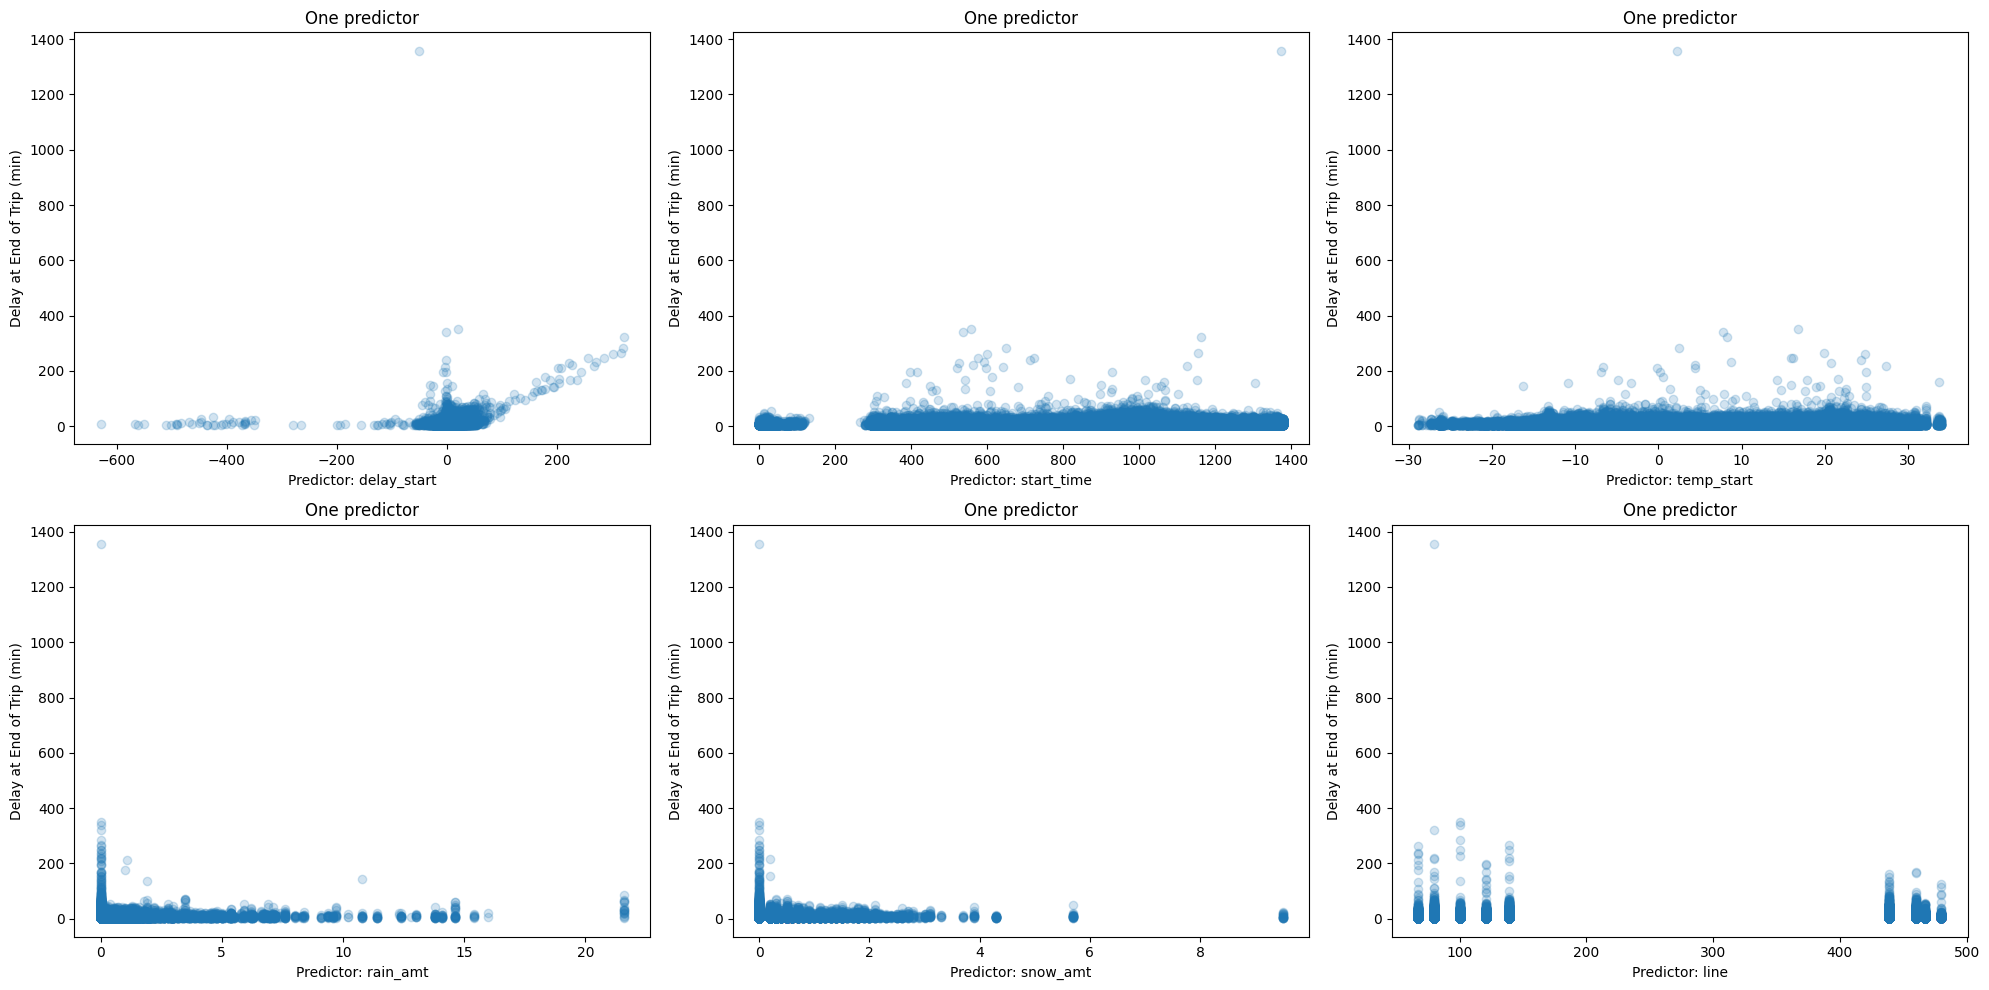

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i, axi in enumerate(ax.flat):
    axi.scatter(df_final[predictors[i]], df_final[outcome], color='tab:blue', alpha=0.2)
    axi.set_ylabel('Delay at End of Trip (min)')
    axi.set_xlabel(f'Predictor: {predictors[i]}')
    axi.set_title("One predictor");

plt.tight_layout()
plt.savefig('../Images/3_1_5_scatter_plots_2.png')
plt.show()

In [25]:
model = sm.OLS(df_final[outcome], df_final[predictors].assign(const=1))
results = model.fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              delay_end   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1600.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:09:28   Log-Likelihood:            -5.6936e+05
No. Observations:              167749   AIC:                         1.139e+06
Df Residuals:                  167742   BIC:                         1.139e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
delay_start     0.1914      0.002     93.278      0.000       0.187       0.195
start_time      0.0011    6.2e-05     18.052      0.000       0.001       0.001
temp_start     -0.0098      0.001     -6.553      0.000      -0.013      -0.007
rain_amt        0.2959      0.026     11.230      0.000       0.244       0.347
snow_amt        0.5025      0.075      6.741      0.000       0.356       0.649
line            0.0014      0.000     13.082      0.000       0.001       0.002
const           7.3303      0.059    125.088      0.000       7.215       7.445
==============================================================================
Omnibus:                   512699.719   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     407042958059.800
Skew:                          45.181   Prob(JB):                         0.00
Kurtosis:                    7633.717   Cond. No.                     3.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
summary2 = results.summary()

# Initialize an empty string for the markdown text
markdown_text2 = ""

# Iterate over all tables in the summary
for i, table in enumerate(summary2.tables):
    # Convert the table to a DataFrame
    df_table = pd.DataFrame(table.data)
    
    # Set the DataFrame's column headers to the first row of data
    df_table.columns = df_table.iloc[0]
    df_table = df_table[1:]
    
    # Convert the DataFrame to a markdown table
    markdown_table = df_table.to_markdown()
    
    # Append the markdown table to the markdown text
    markdown_text2 += f"**Table {i+1}**\n\n"
    markdown_text2 += markdown_table
    markdown_text2 += "\n\n"

# Print the markdown text
print(markdown_text2)

**Table 1**

|    | Dep. Variable:    | delay_end        |   R-squared:            |    0.054    |
|---:|:------------------|:-----------------|:------------------------|:------------|
|  1 | Model:            | OLS              | Adj. R-squared:         | 0.054       |
|  2 | Method:           | Least Squares    | F-statistic:            | 1600.       |
|  3 | Date:             | Sun, 24 Dec 2023 | Prob (F-statistic):     | 0.00        |
|  4 | Time:             | 13:10:27         | Log-Likelihood:         | -5.6936e+05 |
|  5 | No. Observations: | 167749           | AIC:                    | 1.139e+06   |
|  6 | Df Residuals:     | 167742           | BIC:                    | 1.139e+06   |
|  7 | Df Model:         | 6                |                         |             |
|  8 | Covariance Type:  | nonrobust        |                         |             |

**Table 2**

|    |             |    coef |   std err |       t |   P>|t| |   [0.025 |   0.975] |
|---:|:------------|--------

The model is still very unreliable, there is not enough data to correlate weather with delays\
We will attempt to add traffic data

<div style="display: flex; justify-content: space-between;">
<a style="flex: 1; text-align: left;" href="./6_1_3_Traffic.ipynb">← Previous: Appendix A.3: Traffic Data</a>
<span style="flex: 1; text-align: center;">Appendix B.1: MLR With Weather</span>
<a style="flex: 1; text-align: right;" href="./6_2_2_MLR_bus_traffic.ipynb">Next: Appendix B.2: MLR With Traffic →</a>
</div>
